In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, roc_curve, auc, confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [40]:
df_train=pd.read_csv('training_data_cleansed.csv')
#df_train=pd.read_csv('training_data_cleansed_no_2009.csv')

In [41]:
print len(df_train)
df_train=df_train[df_train['year']!=2009]
print len(df_train)

43106
40876


In [42]:
df_test=pd.read_csv('predicting_data_cleansed.csv')

In [43]:
adv_reac_train=pd.read_csv('col_1_train.csv')

In [44]:
adv_reac_test=pd.read_csv('col_1_test.csv')

In [45]:
adv_reac_bool_train=pd.read_csv('col_1_bool_train.csv')

In [46]:
adv_reac_bool_test=pd.read_csv('col_1_bool_test.csv')

In [47]:
len(adv_reac_train)

40876

In [48]:
spl_train=pd.read_csv('col_9_train.csv')
spl_test=pd.read_csv('col_9_test.csv')
spl_bool_train=pd.read_csv('col_9_bool_train.csv')
spl_bool_test=pd.read_csv('col_9_bool_test.csv')

In [49]:
y_train=df_train['target'][df_train['year']!=2009]
y_test=df_test['target']

In [50]:
rfc=RandomForestClassifier(n_estimators=500,n_jobs=-1,class_weight='balanced',random_state=100)

In [51]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [52]:
hyperparameters={
    'criterion': ['gini','entropy'],
    'n_estimators': [30,300],
    'min_samples_leaf': [1, 5]
    }

In [53]:
grid_search=GridSearchCV(rfc,hyperparameters,scoring='recall')
grid_search_spl=GridSearchCV(rfc,hyperparameters,scoring='recall')

In [54]:
grid_search.fit(adv_reac_train,y_train)
grid_search_spl.fit(spl_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [55]:
print grid_search.best_estimator_
print grid_search_spl.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)


In [56]:
print grid_search.best_score_
print grid_search_spl.best_score_

0.189389306016
0.159087017054


In [57]:
print grid_search.best_params_
print grid_search_spl.best_params_

{'n_estimators': 30, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'n_estimators': 30, 'criterion': 'entropy', 'min_samples_leaf': 5}


In [58]:
best=grid_search.best_estimator_
best_spl=grid_search_spl.best_estimator_

In [59]:
best.fit(adv_reac_train,y_train)
best_spl.fit(spl_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [60]:
predictions_train=best.predict(adv_reac_train)
predictions_test=best.predict(adv_reac_test)
predictions_spl_train=best_spl.predict(spl_train)
predictions_spl_test=best_spl.predict(spl_test)

In [64]:
print recall_score(y_train,predictions_train)
print recall_score(y_test,predictions_test)
print '\n'
print precision_score(y_train,predictions_train)
print precision_score(y_test,predictions_test)
print '\n'
print recall_score(y_train,predictions_spl_train)
print recall_score(y_test,predictions_spl_test)
print '\n'
print precision_score(y_train,predictions_spl_train)
print precision_score(y_test, predictions_spl_test)

0.931818181818
0.0266666666667


0.372727272727
0.021978021978


0.954545454545
0.0


0.572727272727
0.0


/Users/ariburian/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
cm_train=pd.DataFrame(confusion_matrix(y_train,predictions_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [66]:
print cm_train
print cm_spl_train

          Pred. 0  Pred. 1
Actual 0    40537      207
Actual 1        9      123
          Pred. 0  Pred. 1
Actual 0    40650       94
Actual 1        6      126


In [67]:
cm_test=pd.DataFrame(confusion_matrix(y_test,predictions_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [68]:
print cm_test
print cm_spl_test

          Pred. 0  Pred. 1
Actual 0    43624      178
Actual 1      146        4
          Pred. 0  Pred. 1
Actual 0    43802        0
Actual 1      150        0


In [69]:
##############################

In [70]:
rfc_2=RandomForestClassifier(n_estimators=500,n_jobs=-1,class_weight='balanced',random_state=100)

In [71]:
grid_search_2=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
grid_search_2_spl=GridSearchCV(rfc_2,hyperparameters,scoring='recall')

In [92]:
for col in spl_bool_train:
    spl_bool_train[col]=spl_bool_train[col].fillna(0)

In [96]:
for col in adv_reac_bool_train:
    adv_reac_bool_train[col]=adv_reac_bool_train[col].fillna(0)

In [97]:
adv_reac_bool_train.isnull().sum()

Unnamed: 0                             0
0                                      0
1                                      0
2                                      0
3                                      0
4                                      0
5                                      0
6                                      0
7                                      0
8                                      0
9                                      0
10                                     0
11                                     0
12                                     0
13                                     0
14                                     0
15                                     0
16                                     0
17                                     0
18                                     0
19                                     0
20                                     0
21                                     0
22                                     0
23              

In [ ]:
grid_search_2.fit(adv_reac_bool_train,y_train)
grid_search_2_spl.fit(spl_bool_train,y_train)

In [ ]:
print grid_search_2.best_estimator_
print grid_search_2_spl.best_estimator_

In [99]:
print grid_search_2.best_score_
print grid_search_2_spl.best_score_

0.18180974595394864

In [101]:
print grid_search_2.best_params_
print grid_search_2_spl.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 5, 'n_estimators': 300}

In [102]:
best_2=grid_search_2.best_estimator_
best_2_spl=grid_search_2_spl.best_estimator_

In [103]:
best_2.fit(adv_reac_bool_train,y_train)
best_2_spl.fit(spl_bool_train,y_train)

building tree 1 of 300building tree 2 of 300

building tree 3 of 300 
building tree 4 of 300
building tree 5 of 300 
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s


building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300building tree 26 of 300

building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s


building tree 31 of 300 
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300building tree 46 of 300



[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300building tree 52 of 300

building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s


building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s


building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.8s


building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.4s


building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.2s


building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.9s


building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.6s


building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.5s


building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
 building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.3s


building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.0s


building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 204 of 300
building tree 203 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300 
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300building tree 215 of 300

building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.0s


building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   10.9s


building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
 building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300 building tree 259 of 300

building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.0s


building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.0s


building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
 building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300building tree 292 of 300

building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.8s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=100, verbose=10,
            warm_start=False)

In [105]:
predictions_2_train=best_2.predict(adv_reac_bool_train)
predictions_2_test=best_2.predict(adv_reac_bool_test)
prediction_2_spl_train=best_2_spl.predict(spl_bool_train)
predictions_2_spl_test=best_2_spl.predict(spl_bool_test)

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Do

In [106]:
print recall_score(y_train,predictions_2_train)
print recall_score(y_test,predictions_2_test)
print '\n'
print precision_score(y_train,predictions_2_train)
print precision_score(y_test,predictions_2_test)
print '\n'
print recall_score(y_train,predictions_2_spl_train)
print recall_score(y_test,predictions_2_spl_test)
print '\n'
print precision_score(y_train,predictions_2_spl_train)
print precision_score(y_train,predictions_2_spl_test)

0.857142857143
0.08
0.103448275862
0.00892857142857


In [107]:
cm_2_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [108]:
print cm_2_train
print cm_2_spl_train

,Pred. 0,Pred. 1
Actual 0,41985,988
Actual 1,19,114


In [109]:
cm_2_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [110]:
print cm_2_test
print cm_2_spl_test

,Pred. 0,Pred. 1
Actual 0,42470,1332
Actual 1,138,12


In [111]:
12/(12+1332.0)

0.008928571428571428

In [112]:
12/(12+2924.0)

0.004087193460490463

In [113]:
12/150.0

0.08

In [114]:
#################

In [128]:
probablities_train=best_2.predict_proba(adv_reac_bool_train)
probablities_test=best_2.predict_proba(adv_reac_bool_test)



[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Do

In [129]:
probabilities_train

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.31676327,  0.68323673],
       [ 0.59869463,  0.40130537],
       [ 0.07500187,  0.92499813]])

In [130]:
fp_train, tp_train, thresholds_train = roc_curve(y_train, probabilities_train[:,1], pos_label=1)

In [133]:
thresholds_train

array([  9.99244583e-01,   9.90632591e-01,   9.85564777e-01, ...,
         1.22833555e-04,   1.16094139e-04,   0.00000000e+00])

In [132]:
auc(fp_train, tp_train)

0.98475874604949531

In [ ]:
plt.plot(fp_train, tp_train)
plt.plot([0, 1], [0, 1], linestyle='--')

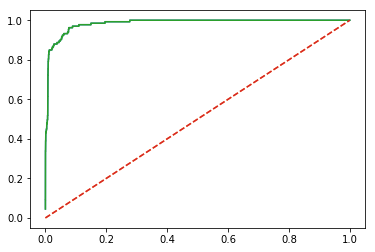

In [137]:
plt.plot(fp_train, tp_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [138]:
fp_test, tp_test, thresholds_test = roc_curve(y_test, probabilities_test[:,1], pos_label=1)

In [139]:
auc(fp_test, tp_test)

0.45506346742157888

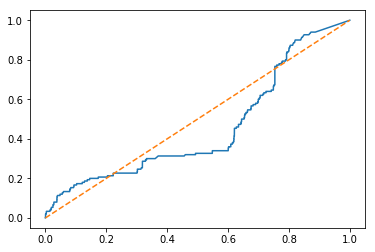

In [140]:
plt.plot(fp_test, tp_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [144]:
p_train,r_train,thresh_train=precision_recall_curve(y_train, probabilities_train[:,1], pos_label=1)

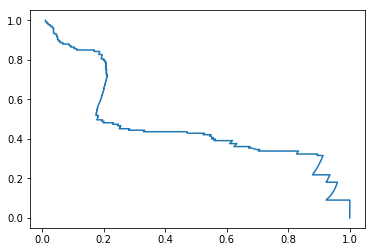

In [154]:
plt.plot(p_train, r_train)

plt.show()

In [146]:
p_test,r_test,thresh_test=precision_recall_curve(y_test, probabilities_test[:,1], pos_label=1)

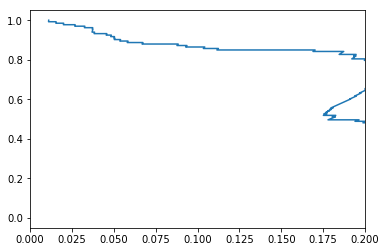

In [153]:
plt.plot(p_train, r_train)
plt.xlim(0,0.2)
plt.show()